# Diffusion

In this notebook you will:
- Analyze one-dimensional diffusion
- Evolve a delta function initial condition
- Compare with analytic solution
- Investigate position-dependent diffusion constant: e.g. $D = D_0 \exp(- |x| / \lambda)$
- Try to solve this new problem analytically

In a nutshell:
- ...

For the future:
- ...

Resources:
- http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg
import copy

%matplotlib inline

# Diffusion equation

# $\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial^2 x}$

Diffusion equation

### TRY:
Understand and explain the intuition behind this equation.

# Euler forward

In [2]:
def diffusion_step_euler_forward(c, D, dx, dt, boundary_conditions=None):
    
    # Create dimensionless coefficient cluster.
    F = D*dt/(dx**2)
    
    c_new = np.zeros(c.shape)
    
    # Update interior points.
    for i in range(1, Nx - 1):
        c_new[i] = c[i] + F*(c[i - 1] - 2 * c[i] + c[i + 1])
    
    # Impose boundary conditions.
    if boundary_conditions is None:
        boundary_conditions = [0, 0]
        
    c_new[0] = boundary_conditions[0]
    c_new[-1] = boundary_conditions[1]
    
    return c_new

In [3]:
# Diffusion constant
D = 0.2

# Discretize space
L = 10 # spatial extent
Nx = 100 # number of spatial grid points - including boundaries
xs = np.linspace(0, L, Nx)
dx = xs[1] - xs[0]

# Discretize time
T = 2 # total time of evolution
Nt = 200 # number of time grid points - including initial and final times
ts = np.linspace(0, T, Nt)
dt = ts[1] - ts[0]

# Create initial condition
c = np.zeros(Nx)

# Plateau
#c[Nx//3:Nx//2] = 1 

# Random
# c = np.random.random(c.shape)

# Gaussian
# mu = L/10
mu= L/2
sigma = L/10
a = 1
c = (a / (sigma*(2*np.pi)**0.5)) * np.exp( -(1/2)*(xs - mu)**2 / sigma**2 )

# Set BCs
bcs = [0, 0]

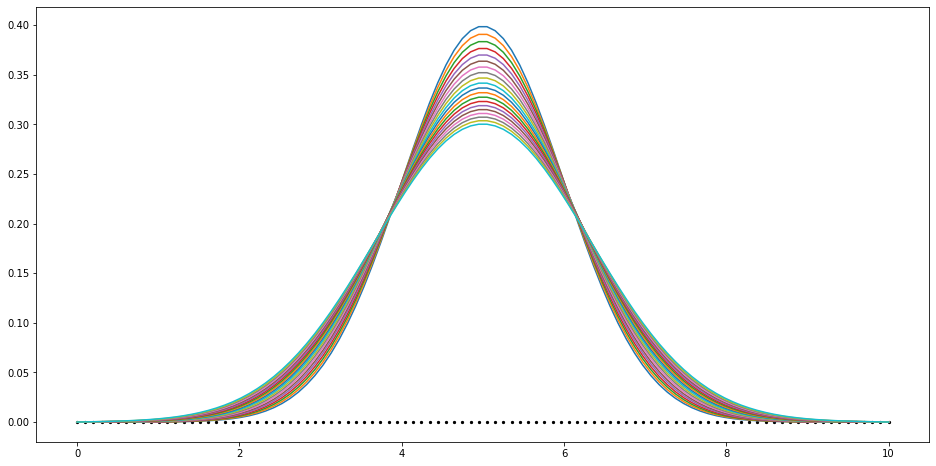

In [4]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(xs, 0*xs, s=5, c='k')
plt.plot(xs, c)

for tind in range(1, Nt):
    c = diffusion_step_euler_forward(c, D, dx, dt, boundary_conditions=bcs)

    if tind % 10 == 0:
        plt.plot(xs, c)

In [5]:
# Starting with a delta function, sometimes we observe oscillations in the function c[x]. Why? Is this a bug? Are we using the method outside of some radius of convergence?
# Find a small T where there is no oscillation, and a high T where there is. Zoom in on the critical value of T.
# Can you get any insight into what is happening in the algorithm?
# Try a few different initial conditions: linear, gaussian,.. - does this instability depend on the sharp edges of the IC?
# Explore a bit more.
# If you change dx, does the critical value of dt change?
# Make a hypothesis about what might be a critical value of F.

In [6]:
### TRY: Is the "stuff" conserved by this scheme?

In [7]:
# TODO: 
# Implement analytic solution.

In [8]:
# TRY:
# Look at behavior of quadratic initial condition.
# Maybe compute temporal diffs?

In [9]:
# TRY: Add an option to the diffusion_step() function for boundary_conditions='free'. Use your intuition to come up with two different ways to implement these "free" boundary conditions. Compare your two methods - do they produce similar results?

In [10]:
# We could store all steps of the evolution. 
# That would allow us to plot as a surface which might be fun.

# Position dependence

# $\frac{\partial C}{\partial t} = \frac{\partial}{\partial x}(D \frac{\partial C}{\partial x})$

What happens when the diffusion "constant" depends on position?

Maybe go through derivation of diffusion equation?
Or maybe just motivate why the partial derivative includes $D$.

# Backward Euler algorithm

In [11]:
def get_A_for_backward_euler(D, dx, dt, Nx):
    
    # Create dimensionless coefficient cluster.
    F = D*dt/(dx**2)
    
    # Data structures for the linear system
    A = np.zeros((Nx, Nx))
#     b = np.zeros(Nx)

    for i in range(1, Nx - 1):
        A[i, i - 1] = -F
        A[i, i + 1] = -F
        A[i, i] = 1 + 2*F

    A[0, 0] = 1
    A[Nx - 1, Nx - 1] = 1
    
    return A

def diffusion_step_backward_euler(c, D, dx, dt, boundary_conditions=None, A=None):
    
    if A is None:
        A = get_A_for_backward_euler(D, dx, dt, Nx)
        
    # Create dimensionless coefficient cluster.
    F = D*dt/(dx**2)
    
    c_new = np.zeros(c.shape)
    
#     # Encode interior points into array b.
#     for i in range(1, Nx - 1):
#         b[i] = c[i] #????     # TODO: no need for a new array 'b' here right?
    
    # Set boundary conditions
    if boundary_conditions is None:
        boundary_conditions = [0, 0]

# ??????
#     b[0] = boundary_conditions[0]
#     b[-1] = boundary_conditions[1]
    
    c[0] = boundary_conditions[0]
    c[-1] = boundary_conditions[1]
    
#     c_new[0] = boundary_conditions[0]
#     c_new[-1] = boundary_conditions[1]
    
    # Compute new configuration.
    c_new[:] = scipy.linalg.solve(A, c)
#     c_new[:] = scipy.linalg.solve(A, b)
    
    return c_new

In [16]:
# Diffusion constant
D = 0.2

# Discretize space
L = 10 # spatial extent
Nx = 100 # number of spatial grid points - including boundaries
xs = np.linspace(0, L, Nx)
dx = xs[1] - xs[0]

# Discretize time
T = 10 # total time of evolution
Nt = 1000 # number of time grid points - including initial and final times
ts = np.linspace(0, T, Nt)
dt = ts[1] - ts[0]

# This is like the "update" matrix for the backward Euler method.
A = get_A_for_backward_euler(D, dx, dt, Nx)

# Gaussian
# mu = L/10
mu= L/2
sigma = L/10
a = 1
c = (a / (sigma*(2*np.pi)**0.5)) * np.exp( -(1/2)*(xs - mu)**2 / sigma**2 )

# Set BCs
bcs = [0.6, 0.2]

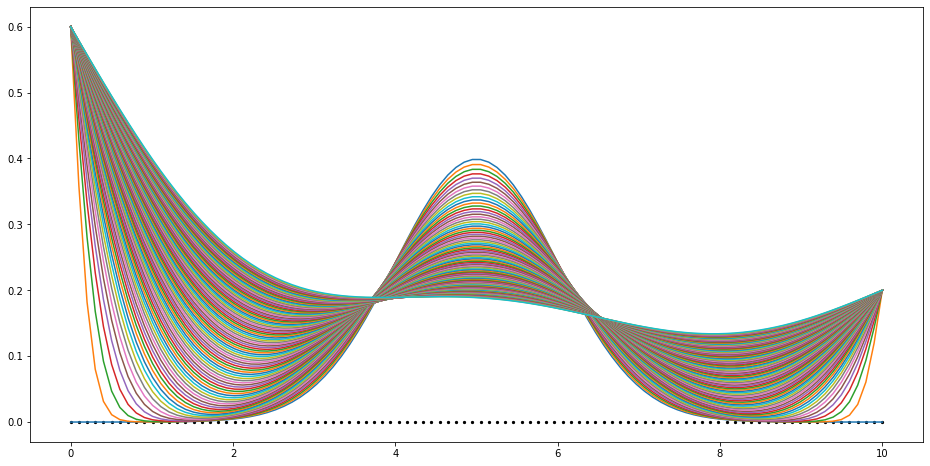

In [17]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(xs, 0*xs, s=5, c='k')
plt.plot(xs, c)

for tind in range(1, Nt):
    c = diffusion_step_backward_euler(c, D, dx, dt, boundary_conditions=bcs, A=A)

    if tind % 10 == 0:
        plt.plot(xs, c)

In [20]:
# TRY: 
# Look more closely at the inflection points of the IC.
# Are they constant in time?

# TRY:
# Do all points evolve in a monotonic fashion?
# If so, why?
# If not, can you construct an IC where this is clearly not true?
# And can you place bounds on the number of direction changes (maybe based on the IC)?

In [19]:
# TRY:
# Test out the stability of the backward Euler method by looking for transitions in behavior.

# RICHARD: the backward Euler method is always stable. Can we provide intuition or a proof?

In [22]:
# THIS WOULD BE A GOOD TIME TO TEACH ABOUT %TIMEIT
# TRY:
# Are we getting something for nothing? Investigate the time-complexity of the two algorithms using some sample runs.

In [78]:
# Create some toy functions to learn about timing code.
# TRY: Understand what these functions do and describe how they do it.
def slow_func(x):
    y = []
    for xx in x:
        if xx > 0:
            y.append(xx)
    return y

def medium_func(x):
    return [xx for xx in x if xx > 0]

def fast_func(x):
    mask = (x > 0)
    return x[mask]

In [79]:
x = np.random.random(10**3)
%timeit slow_func(x)
%timeit medium_func(x)
%timeit fast_func(x)

TI = %timeit fast_func(x) # Explore the attributes of this TI object.

553 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
491 µs ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.05 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.1 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [91]:
from timeit import timeit, Timer
t = Timer('fast_func(x)', globals=globals(), n=100, r=3)
#timeit(stmt="fast_func(x)", globals=globals())
t.timeit()

TypeError: __init__() got an unexpected keyword argument 'n'

size =  1
4.89 µs ± 803 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  2
4.62 µs ± 333 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  4
5.24 µs ± 849 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  8
5.28 µs ± 748 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  16
5.43 µs ± 811 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  32
5.01 µs ± 748 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  64
4.91 µs ± 409 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  128
5.91 µs ± 829 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  256
6.18 µs ± 949 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  512
6.59 µs ± 1.66 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  1024
7.95 µs ± 1.11 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
size =  2048
9.41 µs ± 1.46 µs per loop (mean ± std. dev. of 10 runs, 100

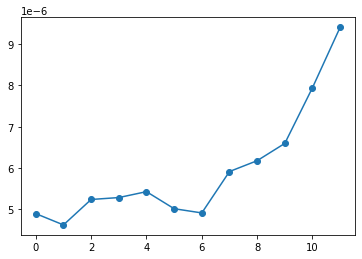

In [95]:
ts = []
sizes = 2**np.arange(0, 12)
for size in sizes:
    print("size = ", size)
    xs = np.random.random(size)
    result = %timeit -o -n 1000 -r 10 fast_func(xs) # -o yields object output
    ts.append(result.average)
    
plt.plot(ts, 'o-')

In [47]:
TI = %timeit -o fast_func(x)
print(TI)

7.13 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.13 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
sizes = 2**np.arange(0, 10)

In [ ]:
# Imagine that this 1D array represents a metal rod at some uniform temperature $T_0$.
# We may apply a heat source (at fixed $T_1 > T_0$), but only to one end at a time.
# We may also pause the application and apply no heat.
# CHALLENGE: Can you devise a heating protocol that will 